<h1 style='background:transparent; color:Red'><center>NFL Big Data Bowl analysis</center></h1>



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

<a id="1"></a>
<h2 style='background:transparent; color:Red'><center>1. Game Data<center><h2>
    
<center><img src="https://c4.wallpaperflare.com/wallpaper/361/392/43/nfl-helmets-wallpaper-preview.jpg"></center>   
    

### **Game data:** The games.csv contains the teams playing in each game. The key variable is gameId.

* **gameId:** Game identifier, unique (numeric)

* **gameDate:** Game Date (time, mm/dd/yyyy)

* **gameTimeEastern:** Start time of game (time, HH:MM:SS, EST)

* **homeTeamAbbr:** Home team three-letter code (text)

* **visitorTeamAbbr:** Visiting team three-letter code (text)

* **week:** Week of game (numeric)

In [ ]:
games = pd.read_csv('../input/nfl-big-data-bowl-2022/games.csv')
games

## Function for Downcast
Downcast is a great skill to compress data size which helps to save memory.

In [ ]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% Compressed'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
games = downcast(games)

## Function for making feature summary 

In [ ]:
def resumetable(df):
    print(f'Shape : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Num of null'] = df.isnull().sum().values
    summary['Num of unique'] = df.nunique().values
    summary['First value'] = df.loc[0].values
    summary['Second value'] = df.loc[1].values
    summary['Third value'] = df.loc[2].values
    return summary

resumetable(games)

## Function for writing percent at the top of the bar graph

In [ ]:
def write_percent(ax, total_size):
    '''Traverse the figure object and display the ratio at the top of the bar graph.'''
    for patch in ax.patches:
        height = patch.get_height() # Figure height (number of data)
        width = patch.get_width() # Figure width
        left_coord = patch.get_x() # The x-axis position on the left edge of the figure
        percent = height/total_size*100 # percent
        
        # Type text in the (x, y) coordinates
        ax.text(x=left_coord + width/2.0, # x-axis position
                y=height + total_size*0.001, # y-axis position
                s=f'{percent:1.1f}%', # Text
                ha='center') # in the middle

## Make derivative features (month, day, hour)

In [ ]:
games['month'] = games['gameDate'].apply(lambda x: int(x.split('/')[0]))
games['day'] = games['gameDate'].apply(lambda x: int(x.split('/')[1]))
games['hour'] = games['gameTimeEastern'].apply(lambda x: int(x.split(':')[0]))

## Data Visualization

In [ ]:
mpl.rc('font', size=15) # Set font size
plt.figure(figsize=(7, 6)) # Set figure size

ax = sns.countplot(x='season', data=games)
write_percent(ax, len(games)) 
ax.set_title('Number of games for season');

#### As the years go by, the number of games increases

In [ ]:
mpl.rc('font', size=15)
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='month', data=games)
write_percent(ax, len(games))
ax.set_title('Number of games for month');

#### The game was held from September to January. There are especially many games in December, and they are rarely held in January

In [ ]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='day', data=games)
write_percent(ax, len(games))
ax.set_title('Number of games for day');

In [ ]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='gameTimeEastern', data=games)
write_percent(ax, len(games))
ax.set_title('Number of games for gameTimeEastern');
ax.tick_params('x', labelrotation=30) # rotate 30 degree of x label

In [ ]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='hour', data=games)
write_percent(ax, len(games))
ax.set_title('Number of games for hour');

#### The most games were held at 1, 4, and 8

In [ ]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='week', data=games)
write_percent(ax, len(games))
ax.set_title('Number of games for week');

### Pairplot for the gamedata 

In [ ]:
sns.pairplot(games, hue='homeTeamAbbr')

In [ ]:
sns.pairplot(games, hue='visitorTeamAbbr')

In [ ]:
sns.pairplot(games, hue='season')

In [ ]:
sns.pairplot(games, hue='week')

In [ ]:
sns.pairplot(games, hue='gameTimeEastern')

<a id="2"></a>
<h2 style='background:transparent; border:0; color:Red'><center>2. Player Data<center><h2>
    
<center><img src="https://www.whatspaper.com/wp-content/uploads/2021/01/4k-nfl-wallpaper-whatspaper-1.jpg"></center>

### **Player data:** The players.csv file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId

* **nflId:** Player identification number, unique across players (numeric)

* **height:** Player height (text)

* **weight:** Player weight (numeric)

* **birthDate:** Date of birth (YYYY-MM-DD)

* **collegeName:** Player college (text)

* **position:** Player position (text)

* **displayName:** Player name (text)

In [ ]:
players = pd.read_csv('../input/nfl-big-data-bowl-2022/players.csv')
players

In [ ]:
players = downcast(players)

In [ ]:
resumetable(players)

In [ ]:
check = players['height'].str.split('-', expand=True)

check.columns = ['first', 'second']

check.loc[(check['second'].notnull()), 'first'] = check[check['second'].notnull()]['first'].astype(np.int16) * 12 + check[check['second'].notnull()]['second'].astype(np.int16)

In [ ]:
players["birthYear"] = 0
players["birthMonth"] = 0
#There are NA values in birthDate so that we should drop them
players.dropna(subset=["birthDate"], inplace=True)
for idx, row in players.iterrows():
    if len(row['birthDate'].split('/')) == 3: # 05/17/1994 
        players.loc[idx, 'birthYear'] = row['birthDate'].split('/')[2]
        players.loc[idx, 'birthMonth'] = row['birthDate'].split('/')[0]
        
    elif len(row['birthDate'].split('-')) == 3: # 1995-05-05
        players.loc[idx, 'birthYear'] = row['birthDate'].split('-')[0]
        players.loc[idx, 'birthMonth'] = row['birthDate'].split('-')[1]

**Converting heights to CM and weights to Kg**

In [ ]:
players_heights = players["height"] # Get the Height data from DataFrame
players_heights = players_heights.apply(lambda x: x.split("-")) # Split the heights by hyphen ("-")

# Convert Heights to Centimeters and add them to DataFrame
players["height"] = players_heights.apply(lambda x: int(x[0]) * 12 + int(x[1]) if len(x) == 2 else int(x[0])) * 2.54

# Convert Weights to Kilograms and them to DataFrame
players["weight"] = round(players.weight * 0.453592, 2)

players

## Time For Some EDA on Players DataSet

In [ ]:
import seaborn as sns
college_df = players['collegeName'].value_counts()
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0] = sns.barplot(x=college_df[:10].values, y=college_df[:10].index, edgecolor="black", ax=axes[0] )
axes[0].set_title("Top 10 College player counts", fontsize=20)
axes[1].pie(x= college_df[:10], labels = college_df[:10].index, autopct='%.0f%%',
           explode=[0.03 for i in college_df[:10].index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

**From the above graph, we can see that, Alabama is at the top with approximately 68 players.**

**Postions played by players**

In [ ]:
pos_df = players['Position'].value_counts()
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0] = sns.barplot(x=pos_df[:10].values, y=pos_df[:10].index, edgecolor="black", ax=axes[0])
axes[0].set_title("Top 10 Postions played by player (By Count)", fontsize=20)
axes[1].pie(x= pos_df[:10], labels = pos_df[:10].index, autopct='%.0f%%',
           explode=[0.03 for i in pos_df[:10].index])
axes[1].add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

**The postion 'WR' is played the most by the players. It is approximately 320 i.e is 16%**

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
sns.regplot(x=players.weight, y=players.height, line_kws={"color": "red"})
plt.title("Player Weight(Kg) vs Player Height(cm)");

**It looks like the taller the player is the heavier he is.**

**Weight and Height Distribution.**

In [ ]:
fig = plt.figure(figsize=(20, 15), dpi=80)

ax1 = fig.add_subplot(223)
sns.histplot(players.weight, ax=ax1)
ax1.set_title("Weight(Kg) Distribution")

ax2 = fig.add_subplot(224)
sns.histplot(players.height, ax=ax2, bins=10)
ax2.set_title("Height(cm) Distribution");

**From the above distribution, we can see that most of the players are between 190cm - 195cm height(390+310 = 700 approximately). Players who are on the shorter side i.e < 170cm are very less roughly 30 in count. Same is with the taller side i.e 200cm - 205cm, And most players are seen to be in between 80kg to 100. Very less people on both the extremes.**

**Player birthyear and birthmonth Distribution**

In [ ]:
fig = plt.figure(figsize=(20, 15), dpi=80)

birthyear = players['birthYear'].value_counts()
ax1 = fig.add_subplot(223)
sns.barplot(x=birthyear.index, y=birthyear.values, ci=None, ax=ax1)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("BirthYear Distribution",size=20)
plt.xlabel("Year", size=15)

birthmonth = players['birthMonth'].value_counts()
ax2 = fig.add_subplot(224)
sns.barplot(x=birthmonth.index, y=birthmonth.values, ci=None, ax=ax2)
ax2.set_title("BirthMonth Distribution",size=20)
plt.xlabel("Month",size=15);

**From the above charts, it can be determined that most players are born in the year 1995. The most frequent birth month is September.**

### Convert all heights to feet

In [ ]:
players['height'] = check['first']
players['height'] = players['height'].astype(np.float32)
players['height'] /= 12

players

In [ ]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 6))

ax = sns.distplot(players['height'], bins=12)
ax.set_title('Height Distribution');

In [ ]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 6))

ax = sns.distplot(players['weight'])
ax.set_title('Weight Distribution');

In [ ]:
top_players_colleage = players['collegeName'].value_counts()[:20].reset_index()
top_players_colleage.columns = ['collageName', 'numberOfPlayers']

In [ ]:
mpl.rc('font', size=10) 
plt.figure(figsize=(15, 12))

ax = sns.barplot(x='numberOfPlayers', y='collageName', data=top_players_colleage)
ax.set_title('Number of players for collegeName');

### Create birth year feature

In [ ]:
players['birthYear'] = 0

In [ ]:
players.dropna(subset=['birthDate'], inplace=True)

## Extract birth year

In [ ]:
for idx, row in players.iterrows():
    if len(row['birthDate'].split('/')) == 3: # ex) 05/17/1994 
        players.loc[idx, 'birthYear'] = row['birthDate'].split('/')[2]
        
    elif len(row['birthDate'].split('-')) == 3: # ex) 1995-05-05
        players.loc[idx, 'birthYear'] = row['birthDate'].split('-')[0]

In [ ]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(players['birthYear'], bins=25)
ax.set_title('Players birth year Distribution');

#### Those born in 1995 are the most common

In [ ]:
players['birthYear'].min(), players['birthYear'].max()

#### The oldest player was born in 1972, and the youngest player was born in 1999

### Pairplot of the players W.R.T position and height

In [ ]:
sns.pairplot(players, hue='Position')

In [ ]:
sns.pairplot(players, hue='height')

<a id="3"></a>
<h2 style='background:transparent; border:0; color:Red'><center>3. Play Data<center><h2>
    
<center><img src="https://sportshub.cbsistatic.com/i/r/2016/06/02/d400604b-681c-4fcf-8d39-7813b69d7da3/thumbnail/1200x675/b1bf18f17cece8a1f5a9b047fb179a41/nfl-shield-logo-general.jpg"></center>

### **Play data:** The plays.csv file contains play-level information from each game. The key variables are gameId and playId
- gameId: Game identifier, unique (numeric)
- playId: Play identifier, not unique across games (numeric)
- playDescription: Description of play (text)
- quarter: Game quarter (numeric)
- down: Down (numeric)
- yardsToGo: Distance needed for a first down (numeric)
- possessionTeam: Team punting, placekicking or kicking off the ball (text)
- specialTeamsPlayType: Formation of play: Extra Point, Field Goal, Kickoff or Punt (text)
- specialTeamsPlayResult: Special Teams outcome of play dependent on play type: Blocked Kick Attempt, Blocked Punt, Downed, Fair Catch, Kick Attempt Good, Kick Attempt No Good, Kickoff Team Recovery, Muffed, Non-Special Teams Result, Out of Bounds, Return or Touchback (text)
- kickerId: nflId of placekicker, punter or kickoff specialist on play (numeric)
- returnerId: nflId(s) of returner(s) on play if there was a special teams return. Multiple returners on a play are separated by a ; (text)
- kickBlockerId: nflId of blocker of kick on play if there was a blocked field goal or blocked punt (numeric)
- yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)
- yardlineNumber: Yard line at line-of-scrimmage (numeric) 
- gameClock: Time on clock of play (MM:SS)
- penaltyCodes: NFL categorization of the penalties that occurred on the play. Multiple penalties on a play are separated by a ; (text)
- penaltyJerseyNumber: Jersey number and team code of the player committing each penalty. Multiple penalties on a play are separated by a ; (text)
- penaltyYards: yards gained by possessionTeam by penalty (numeric)
- preSnapHomeScore: Home score prior to the play (numeric)
- preSnapVisitorScore: Visiting team score prior to the play (numeric)
- passResult: Scrimmage outcome of the play if specialTeamsPlayResult is "Non-Special Teams Result" (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble, ' ': Designed Rush, text)
- kickLength: Kick length in air of kickoff, field goal or punt (numeric)
- kickReturnYardage: Yards gained by return team if there was a return on a kickoff or punt (numeric)
- playResult: Net yards gained by the kicking team, including penalty yardage (numeric)
- absoluteYardlineNumber: Location of ball downfield in tracking data coordinates (numeric)

In [ ]:
plays = pd.read_csv('../input/nfl-big-data-bowl-2022/plays.csv')

plays

In [ ]:
plays = downcast(plays)

In [ ]:
resumetable(plays)

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='quarter', y='down', data=plays)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(x='quarter', y='yardsToGo', data=plays, ci=None)
g.bar_label(g.containers[0])
plt.title('Yards to Go in Each Quarter', size=15)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(x='quarter', y='playResult', data=plays, ci=None)
g.bar_label(g.containers[0])
plt.title("Play result for every quarter", size=15)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.distplot(plays['kickLength'])
plt.show()

In [ ]:
plays['kickLength'].describe()

## The mean kick length is 54.744166. The minimum is 2.000 and the max is 90.000.

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.histplot(plays['passResult'])
plt.show()

In [ ]:
plays['passResult'].describe()

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.histplot(plays['possessionTeam'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as pg
from plotly import tools as tl

In [ ]:
tr18 = pd.read_csv("../input/nfl-big-data-bowl-2022/tracking2018.csv")
tr18.head()

In [ ]:
data = tr18.query('playId == 36 and gameId == 2018123000')
print(data[["x", "y", "team"]])

In [ ]:
fig = px.scatter(data, x='x', y='y', color='team')
fig.show()

In [ ]:
data = tr18.query('playId == 36 and gameId == 2018102107')
print(data[["x", "y", "team"]])

In [ ]:
fig = px.scatter(data, x="x", y="y", color="team")
fig.show()

In [ ]:
data = tr18.query('position == "CB" and gameId == 2018111900')
print(data[["x", "y", "team"]])

In [ ]:
fig = px.scatter(data, x="x", y="y", color="team")
fig.show()

#### There are lots of null values in `returnerld`, `kickBlockerId`, `penaltyCodes`, `penaltyJerseyNumbers`, `penaltyYards`, `passResult`, `kickReturnYardage` features

In [ ]:
mpl.rc('font', size=12) 
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='quarter', data=plays)
write_percent(ax, len(plays))
ax.set_title('Number of plays of every quarter');

In [ ]:
mpl.rc('font', size=12) 
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='down', data=plays)
write_percent(ax, len(plays))
ax.set_title('Number of plays of every down');

In [ ]:
mpl.rc('font', size=12) 
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='yardsToGo', data=plays)
ax.set_title('Number of plays for every yards to go category');

In [ ]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(plays['playResult'], bins=25);
ax.set_title('playResult Distribution'); 

## playResult: Net yards gained by the offense, including penalty yardage (numeric)

In [ ]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(plays['preSnapHomeScore'], bins=12);
ax.set_title('preSnapHomeScore Distribution'); 

> preSnapHomeScore: Home score prior to the play (numeric)

In [ ]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(plays['preSnapVisitorScore'], bins=12);
ax.set_title('preSnapVisitorScore Distribution'); 

### A pairplot for the gameplay information file with the hue 

In [ ]:
sns.pairplot(plays,hue='quarter')

In [ ]:
sns.pairplot(plays,hue='possessionTeam')

In [ ]:
sns.pairplot(plays,hue='specialTeamsPlayType')

In [ ]:
sns.pairplot(plays,hue='specialTeamsResult')

<a id="3"></a>
<h2 style='background:transparent; border:0; color:Red'><center>4. Tracking Data<center><h2>
    
<center><img src="https://itipsports.com.au/storage/2021/06/nfl-logo-mgn.jpg"></center>

# Tracking data visualization

**Hello everyone!**

As a great sports fan, I'm always more than happy to participate in sport's competitions on Kaggle! 
Americal football has always fascinated me, but unfortunately as a European, I might don't fully understand all the rules, so if you find any error in this notebook - you're more than welcome to correct me :)

* **The goal of this notebook is to build a tool to visualize matches more nicely.**
* **Visualized tracking data can allow us to understand data better and develop better solutions**
* **You'll learn how to draw pitch in matplotlib**
* **You'll learn how to create animations**
* **You'll learn how to create ipywidgets, making your notebooks interactive**
* **The Whole tool is implemented in sole matplotlib which I hope makes this notebook even more didactic**

*I hope that code is self-explanatory but if anything is unclear - just let me know and I will do my best to help!*

# I invite you to ebmark on this journey with me - let's visualize and animate tracking data together.

# Football field

**From wiki:**
> The rectangular field of play used for American football games measures 100 yards (91.44 m) long between the goal lines, and 160 feet (48.8 m) (53+1⁄3 yards) wide. The field is made of grass. In addition, there are end zones extending another 10 yards (9.144 m) past the goal lines to the "end lines", for a total length of 120 yards (109.7 m). When the "football field" is used as unit of measurement, it is usually understood to mean 100 yards (91.44 m), although technically the full length of the official field, including the end zones, is 120 yards (109.7 m). There is a goal centered on each end line, with a crossbar 10 feet (3.0 m) above the ground and goalposts 18 feet 6 inches (5.64 m) apart extending at least 35 feet (11 m) above the crossbar. Between the goal lines, additional lines span the width of the field at 5-yard intervals.

**Visualizations in this notebook are based on the above informations from Wikipedia and the the image provided by competition's organizers**



# Let's draw football pitch in matplotlib

In [ ]:
import matplotlib.patches as patches
from matplotlib.patches import Arc
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Change size of the figure
plt.rcParams['figure.figsize'] = [20, 16]
def drawPitch(width, height, color="w"):
    fig = plt.figure()
    ax = plt.axes(xlim=(-10, width + 30), ylim=(-15, height + 5))
    plt.axis('off')

    # Grass around pitch
    rect = patches.Rectangle((-10, -5), width + 40, height + 10, linewidth=1, facecolor='#3f995b', capstyle='round')
    ax.add_patch(rect)
    ###################

    # Pitch boundaries
    rect = plt.Rectangle((0, 0), width + 20, height, ec=color, fc="None", lw=2)
    ax.add_patch(rect)
    ###################

    # vertical lines - every 5 yards
    for i in range(21):
        plt.plot([10 + 5 * i, 10 + 5 * i], [0, height], c="w", lw=2)
    ###################
        
    # distance markers - every 10 yards
    for yards in range(10, width, 10):
        yards_text = yards if yards <= width / 2 else width - yards
        # top markers
        plt.text(10 + yards - 2, height - 7.5, yards_text, size=20, c="w", weight="bold")
        # botoom markers
        plt.text(10 + yards - 2, 7.5, yards_text, size=20, c="w", weight="bold", rotation=180)
    ###################

    # yards markers - every yard
    # bottom markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [1, 3], color="w", lw=3)

    # top markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [height - 1, height - 3], color="w", lw=3)

    # middle bottom markers
    y = (height - 18.5) / 2
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [y, y + 2], color="w", lw=3)

    # middle top markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [height - y, height - y - 2], color="w", lw=3)
    ###################

    # draw home end zone
    plt.text(2.5, (height - 10) / 2, "HOME", size=40, c="w", weight="bold", rotation=90)
    rect = plt.Rectangle((0, 0), 10, height, ec=color, fc="#0064dc", lw=2)
    ax.add_patch(rect)

    # draw away end zone    
    plt.text(112.5, (height - 10) / 2, "AWAY", size=40, c="w", weight="bold", rotation=-90)
    rect = plt.Rectangle((width + 10, 0), 10, height, ec=color, fc="#c80014", lw=2)
    ax.add_patch(rect)
    ###################
    
    # draw extra spot point
    # left
    y = (height - 3) / 2
    plt.plot([10 + 2, 10 + 2], [y, y + 3], c="w", lw=2)
    
    # right
    plt.plot([width + 10 - 2, width + 10 - 2], [y, y + 3], c="w", lw=2)
    ###################
    
    # draw goalpost
    goal_width = 6 # yards
    y = (height - goal_width) / 2
    # left
    plt.plot([0, 0], [y, y + goal_width], "-", c="y", lw=10, ms=20)
    # right
    plt.plot([width + 20, width + 20], [y, y + goal_width], "-", c="y", lw=10, ms=20)
    
    return fig, ax

fig, ax = drawPitch(100, 53.3)

In [ ]:
tracking2018 = pd.read_csv('../input/nfl-big-data-bowl-2022/tracking2018.csv')
tracking2019 = pd.read_csv('../input/nfl-big-data-bowl-2022/tracking2019.csv')
tracking2020 = pd.read_csv('../input/nfl-big-data-bowl-2022/tracking2020.csv')

In [ ]:
tracking2018.head()
tracking2019.head()
tracking2020.head()

In [ ]:
tracking2018 = downcast(tracking2018)
tracking2019 = downcast(tracking2019)
tracking2020 = downcast(tracking2020)

# Let's add some interactivity
From provided dropdown widgets you can choose a demanded game.

**Animation's creation can take a while (depending on play's length - sometimes even up to 60s, so don't give up after clicking start)**

#### 2018123000 and playId == 36

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
tracking2018.query('gameId == 2018123000 and playId == 36').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

#### gameId == 2018091001 and playId == 4033

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
tracking2018.query('gameId == 2018091001 and playId == 4033').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

#### gameId == 2018091609 and position == "CB"

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
tracking2018.query('gameId == 2018091609 and position == "CB"').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

#### gameId == 2018091609 and position == "LB"

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
tracking2018.query('gameId == 2018091609 and position == "LB"').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

#### gameId == 2018091609 and position == "RB"

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
tracking2018.query('gameId == 2018091609 and position == "RB"').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

## Function to create football field


In [ ]:
 fig, ax = drawPitch(100, 53.3)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
%matplotlib inline
import seaborn as sns

#(Credit for the below code goes to @ANZ check out his notebook as well)
cmap = cm.get_cmap('GnBu',12) #colormap and number
col_def =[]
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    col_def.append(rgb2hex(rgb))
    print(rgb2hex(rgb))

## Function to create animation

In [ ]:
games_ids = {}
games_tracking2018 = tracking2018.groupby(by=["gameId"])
for game, data in games_tracking2018:
    games_ids[game] = list(set(data.playId.tolist()))

In [ ]:
def extract_one_game(game_id, play_id, df):
    game = df[(df.gameId == game_id) & (df.playId == play_id)]
    home1 = {}
    away1 = {}
    balls1 = []
    
    players = game.sort_values(['frameId'], ascending=True).groupby('nflId')
    for id, dx in players:
        jerseyNumber = int(dx.jerseyNumber.iloc[0])
        if dx.team.iloc[0] == "home":
            home1[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))
        elif dx.team.iloc[0] == "away":
            away1[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))


    ball_df = game.sort_values(['frameId'], ascending=True) 
    ball_df = ball_df[ball_df.team == "football"]
    balls1 = list(zip(ball_df.x.tolist(), ball_df.y.tolist()))
    return home1, away1, balls1

In [ ]:
games_ids = {}
games_tracking2019 = tracking2019.groupby(by=["gameId"])
for game, data in games_tracking2019:
    games_ids[game] = list(set(data.playId.tolist()))

In [ ]:
def extract_one_game(game_id, play_id, df):
    game = df[(df.gameId == game_id) & (df.playId == play_id)]
    home2 = {}
    away2 = {}
    balls2 = []
    
    players = game.sort_values(['frameId'], ascending=True).groupby('nflId')
    for id, dx in players:
        jerseyNumber = int(dx.jerseyNumber.iloc[0])
        if dx.team.iloc[0] == "home":
            home2[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))
        elif dx.team.iloc[0] == "away":
            away2[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))


    ball_df = game.sort_values(['frameId'], ascending=True) 
    ball_df = ball_df[ball_df.team == "football"]
    balls2 = list(zip(ball_df.x.tolist(), ball_df.y.tolist()))
    return home2, away2, balls2

In [ ]:
games_ids = {}
games_tracking2020 = tracking2020.groupby(by=["gameId"])
for game, data in games_tracking2020:
    games_ids[game] = list(set(data.playId.tolist()))

In [ ]:
def extract_one_game(game_id, play_id, df):
    game = df[(df.gameId == game_id) & (df.playId == play_id)]
    home3 = {}
    away3 = {}
    balls3 = []
    
    players = game.sort_values(['frameId'], ascending=True).groupby('nflId')
    for id, dx in players:
        jerseyNumber = int(dx.jerseyNumber.iloc[0])
        if dx.team.iloc[0] == "home":
            home3[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))
        elif dx.team.iloc[0] == "away":
            away3[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))


    ball_df = game.sort_values(['frameId'], ascending=True) 
    ball_df = ball_df[ball_df.team == "football"]
    balls3 = list(zip(ball_df.x.tolist(), ball_df.y.tolist()))
    return home3, away3, balls3

In [ ]:
from matplotlib import animation
from IPython.display import HTML
def animate_one_play(game_id, play_id, df):
    fig, ax = drawPitch(100, 53.3)
    
    home1, away1, balls1 = extract_one_game(game_id, play_id, df)

    team_left, = ax.plot([], [], 'o', markersize=20, markerfacecolor="r", markeredgewidth=2, markeredgecolor="white", zorder=7)
    team_right, = ax.plot([], [], 'o', markersize=20, markerfacecolor="b", markeredgewidth=2, markeredgecolor="white", zorder=7)
    ball, = ax.plot([], [], 'o', markersize=10, markerfacecolor="black", markeredgewidth=2, markeredgecolor="white", zorder=7)
    drawings = [team_left, team_right, ball]

    def init():
        team_left.set_data([], [])
        team_right.set_data([], [])
        ball.set_data([], [])
        return drawings

    def draw_teams(i):
        X = []
        Y = []
        for k, v in home1.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_left.set_data(X, Y)
        
        X = []
        Y = []
        for k, v in away1.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_right.set_data(X, Y)

    def animate(i):
        draw_teams(i)
        
        x, y = balls1[i]
        ball.set_data([x, y])
        return drawings
    
    # !May take a while!
    anim1 = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(balls1), interval=100, blit=True)

    return HTML(anim1.to_html5_video())

In [ ]:
from matplotlib import animation
from IPython.display import HTML
def animate_one_play(game_id, play_id, df):
    fig, ax = drawPitch(100, 53.3)
    
    home2, away2, balls2 = extract_one_game(game_id, play_id, df)

    team_left, = ax.plot([], [], 'o', markersize=20, markerfacecolor="r", markeredgewidth=2, markeredgecolor="white", zorder=7)
    team_right, = ax.plot([], [], 'o', markersize=20, markerfacecolor="b", markeredgewidth=2, markeredgecolor="white", zorder=7)
    ball, = ax.plot([], [], 'o', markersize=10, markerfacecolor="black", markeredgewidth=2, markeredgecolor="white", zorder=7)
    drawings = [team_left, team_right, ball]

    def init():
        team_left.set_data([], [])
        team_right.set_data([], [])
        ball.set_data([], [])
        return drawings

    def draw_teams(i):
        X = []
        Y = []
        for k, v in home2.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_left.set_data(X, Y)
        
        X = []
        Y = []
        for k, v in away2.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_right.set_data(X, Y)

    def animate(i):
        draw_teams(i)
        
        x, y = balls2[i]
        ball.set_data([x, y])
        return drawings
    
    # !May take a while!
    anim2 = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(balls2), interval=100, blit=True)

    return HTML(anim2.to_html5_video())

In [ ]:
from matplotlib import animation
from IPython.display import HTML
def animate_one_play(game_id, play_id, df):
    fig, ax = drawPitch(100, 53.3)
    
    home3, away3, balls3 = extract_one_game(game_id, play_id, df)

    team_left, = ax.plot([], [], 'o', markersize=20, markerfacecolor="r", markeredgewidth=2, markeredgecolor="white", zorder=7)
    team_right, = ax.plot([], [], 'o', markersize=20, markerfacecolor="b", markeredgewidth=2, markeredgecolor="white", zorder=7)
    ball, = ax.plot([], [], 'o', markersize=10, markerfacecolor="black", markeredgewidth=2, markeredgecolor="white", zorder=7)
    drawings = [team_left, team_right, ball]

    def init():
        team_left.set_data([], [])
        team_right.set_data([], [])
        ball.set_data([], [])
        return drawings

    def draw_teams(i):
        X = []
        Y = []
        for k, v in home3.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_left.set_data(X, Y)
        
        X = []
        Y = []
        for k, v in away3.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_right.set_data(X, Y)

    def animate(i):
        draw_teams(i)
        
        x, y = balls3[i]
        ball.set_data([x, y])
        return drawings
    
    # !May take a while!
    anim3= animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(balls3), interval=100, blit=True)

    return HTML(anim3.to_html5_video())

In [ ]:
animate_one_play(2018123000, 36, tracking2018)

## Some visualizations about Scouting data

<h2 style='background:transparent; border:0; color:Red'><center>Some visualizations about Scouting data<center><h2>
    
<center><img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/87/NFL_Scouting_Combine_logo.svg/1200px-NFL_Scouting_Combine_logo.svg.png"></center>    

In [ ]:
df_scouting= pd.read_csv('../input/nfl-big-data-bowl-2022/PFFScoutingData.csv')
df_scouting.head()

In [ ]:
df_scouting.info()

### The number of kicktypes and how frequently each one is implemented in the game

In [ ]:
fig, ax = plt.subplots()
df_scouting['kickType'].value_counts().plot(ax=ax, kind='bar')

## I thought of implementing the pairplots here for data as they end up giving us very insightful observations into the dataset as a whole

### A pairplot of the scouting data with the hue as 'kicktype'

In [ ]:
sns.pairplot(df_scouting, hue='kickDirectionActual')

In [ ]:
sns.pairplot(df_scouting, hue='kickDirectionIntended')

In [ ]:
sns.pairplot(df_scouting, hue='kickType')

# Violin Plots and Box Plots

## Here are some plots for comparing various parameters available in the datasets provided, such as kickLength, kickReturnYardage, hangTime, kickType, yardsToGo, etc.

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=plays['quarter'])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=plays['yardsToGo'],y=plays['specialTeamsPlayType'])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=plays['kickLength'],y=plays['kickReturnYardage'])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df_scouting['hangTime'],y=df_scouting['kickContactType'])

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_scouting["hangTime"], y=df_scouting["kickType"])


In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_scouting["hangTime"], y=df_scouting["operationTime"])

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_scouting["hangTime"], y=df_scouting["snapTime"])

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_scouting["snapTime"], y=df_scouting["operationTime"])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=players["height"], y=players["Position"])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=players["weight"], y=players["Position"])

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=players["weight"], y=players["height"])

## Speed on Kickoff Plays Across Surfaces 

In [ ]:
#using df_tracking to merge to jersey numbers

#selecting variables of interest & dropping duplicates - jersey # is constant throughout game
jerseyMap = tracking2018.drop_duplicates(subset = ["gameId", "team", "jerseyNumber", "nflId"])

#joining to games
jerseyMap = pd.merge(jerseyMap, games, left_on=['gameId'], right_on =['gameId'])

#getting name of team
conditions = [
    (jerseyMap['team'] == "home"),
    (jerseyMap['team'] != "home"),
]

values = [jerseyMap['homeTeamAbbr'], jerseyMap['visitorTeamAbbr']]

#adjusting jersey number so that it includes 0 when < 10
jerseyMap['team'] = np.select(conditions, values)

jerseyMap['jerseyNumber'] = jerseyMap['jerseyNumber'].astype(str)

jerseyMap.loc[jerseyMap['jerseyNumber'].map(len) < 4, 'jerseyNumber'] = "0"+jerseyMap.loc[jerseyMap['jerseyNumber'].map(len) < 4, 'jerseyNumber'].str[:2]

jerseyMap['jerseyNumber'] = jerseyMap['jerseyNumber'].str[:2]

#getting team and jersey
jerseyMap['teamJersey'] = jerseyMap['team'] + ' ' + jerseyMap['jerseyNumber'].str[:2]

#map to merge nflId to teamJersey
jerseyMap = jerseyMap[['gameId', 'nflId', 'teamJersey']]

jerseyMap = jerseyMap.sort_values(['gameId', 'nflId', 'teamJersey'])

jerseyMap.head()

In [ ]:
#dataframe will include gameId, playId and nflId for each special teams safety
PFF_specialTeamSafeties = df_scouting.copy()

#splitting into a column for each special teams safety
PFF_specialTeamSafeties[['teamJersey1', 'teamJersey2', 'teamJersey3', 'teamJersey4', 'teamJersey5', 'teamJersey6']] = PFF_specialTeamSafeties['specialTeamsSafeties'].str.split('; ',expand=True)

#selecting jersey numbers for each team_PFF_specialTeamSafeties = PFF_specialTeamSafeties[['gameId', 'playId', 'teamJersey1', 'teamJersey2', 'teamJersey3', 'teamJersey4', 'teamJersey5', 'teamJersey6']]

#gathering data
PFF_specialTeamSafeties = pd.melt(PFF_specialTeamSafeties, id_vars =['gameId', 'playId'], value_vars =['teamJersey1', 'teamJersey2', 'teamJersey3', 'teamJersey4', 'teamJersey5', 'teamJersey6'],
               value_name = 'teamJersey')

#dropping NA rows
PFF_specialTeamSafeties.dropna()

#joining to jersey map
PFF_specialTeamSafeties = pd.merge(PFF_specialTeamSafeties, jerseyMap, on = ['gameId', 'teamJersey'])

#selecting variables of interest
PFF_specialTeamSafeties = PFF_specialTeamSafeties[['gameId', 'playId', 'nflId']]

PFF_specialTeamSafeties = PFF_specialTeamSafeties.sort_values(['gameId', 'playId', 'nflId'])

PFF_specialTeamSafeties.head()

In [ ]:
#creating data frame that will only include deep kickoffs
df_deepKickoffs = plays.copy()

#joining the scouting data
df_deepKickoffs = pd.merge(df_deepKickoffs, df_scouting, on = ['gameId', 'playId'])

#filtering for kickoff plays only & deep kickoffs only
df_deepKickoffs = df_deepKickoffs[(df_deepKickoffs['specialTeamsPlayType'] == 'Kickoff') & (df_deepKickoffs['kickType'] == 'D')]

#selecting variables of interest
df_deepKickoffs = df_deepKickoffs[['gameId', 'playId', 'kickerId', 'possessionTeam']]

df_deepKickoffs.head()

Now, we will use the data frames we created to filter the tracking data. We will use `df_PFF_specialTeamSafeties` to filter out players who were special teams safeties and use `df_deepKickoffs` to remove plays where there was not a deep kickoff. For each player on each play in the the tracking data, we will filter for the first 40 frames which approximately corresponds to the initial sprint portion of the play. Over that interval, we calculate the maximum speed reached for each player in the play.

In [ ]:
df_maxSpeeds = tracking2018.copy()

#joining games
df_maxSpeeds = pd.merge(df_maxSpeeds, games, on = 'gameId')

#using a join to remove special teams safeties
df_maxSpeeds = pd.merge(left = df_maxSpeeds, right = PFF_specialTeamSafeties, how='left', indicator=True, on = ['gameId', 'playId', 'nflId'])

df_maxSpeeds = df_maxSpeeds.loc[df_maxSpeeds._merge == 'left_only', :].drop(columns = '_merge')

#joining deep kickoffs
df_maxSpeeds = pd.merge(df_maxSpeeds, df_deepKickoffs, on = ['gameId', 'playId'])

#removing the kicker from the tracking data
df_maxSpeeds = df_maxSpeeds[(df_maxSpeeds['kickerId'] != df_maxSpeeds['nflId']) &
                            
                            #player is on home team and kicking team is home
                            ((df_maxSpeeds['team']=='home') & (df_maxSpeeds['possessionTeam'] == df_maxSpeeds['homeTeamAbbr']) |
                             
                             #or player is on away team and kicking team is away
                            (df_maxSpeeds['team']=='away') & (df_maxSpeeds['possessionTeam'] == df_maxSpeeds['visitorTeamAbbr']))]

#select variables of interest
df_maxSpeeds = df_maxSpeeds[['gameId', 'playId', 'frameId', 'nflId', 'event', 's']]

#arranging by gameId, playId, frameId and nflId
df_maxSpeeds = df_maxSpeeds.sort_values(['gameId', 'playId', 'frameId'])

#grouping by gameId, playId and nflId & filtering for frames after kickoff
df_maxSpeeds = df_maxSpeeds.loc[df_maxSpeeds.groupby(['gameId', 'playId']).event.transform(lambda z: np.cumsum(z.isin(['kickoff', 'free_kick'])) >= 1)]

#grouping by gameId, playId and nflId & filtering for first 40 observations
df_maxSpeeds = df_maxSpeeds.groupby(['gameId', 'playId', 'nflId']).head(40).reset_index()

#calculating max speed for given play / player
df_maxSpeeds = df_maxSpeeds.groupby(['gameId', 'playId', 'nflId']).s.apply(lambda z: z.max()).reset_index()

#renaming speed column as maxSpeed
df_maxSpeeds = df_maxSpeeds.rename(columns={"s" : "maxSpeed"})
df_maxSpeeds.head()

In [ ]:
#will have max speeds for each player with surface info
df_maxSpeeds2 = df_maxSpeeds.copy()

#merging to Lee Sharpe's data
df_maxSpeeds2 = pd.merge(df_maxSpeeds, df_leeSharpeGames, left_on = ['gameId'], right_on = ['old_game_id'])

#selecting variables of interest
df_maxSpeeds2 = df_maxSpeeds2[['gameId', 'playId', 'nflId', 'week', 'surface', 'maxSpeed']]

#striping the surface column to remove extra spaces at the end
df_maxSpeeds2['surface'] = df_maxSpeeds2['surface'].transform(lambda x : x.str.strip())

df_maxSpeeds2['surface'].unique()

# Mixed Effects Model

To account for the lack of independence among observations from the same player, we fit a mixed effects model of player speed that includes a random intercept for each player (called a random effect) and a fixed effect surface type. The random effect represents how that player, after some shrinkage towards the overall league mean, compares to the league average. Random effects models allow us to avoid overfitting (e.g., a fixed effect for each player, and the shrinkage towards league average pulls some players more than others (those with fewer observations get pulled further towards the league average).

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#fitting model
model = smf.mixedlm(formula= "maxSpeed ~ C(surface, Treatment(reference='grass'))", data = df_maxSpeeds2, groups = 'nflId')

modelF = model.fit(method=["lbfgs"])
print(modelF.summary())

In [ ]:
modelF.params

In [ ]:
#saving results of model in data frame. extracting ids:
df_modelResults = pd.DataFrame.from_dict(modelF.random_effects, orient = 'index').reset_index()

#renaming the columns appropriately
df_modelResults = df_modelResults.rename(columns={"index" : "nflId", "nflId" : "effect"})

#joining by nflId
df_modelResults = pd.merge(df_modelResults, players, on = 'nflId')

#selecting variables of interest
df_modelResults = df_modelResults[['nflId', 'displayName', 'effect']]

df_modelResults.head()

Our results give us a player effect for each player which we can use to rank them. First, we plot the top 25 players with the highest player effect:

In [ ]:
#ordering for top effects
df_modelResults = df_modelResults.sort_values(by = 'effect', ascending = False)

#filtering for top 25
df_visual1 = df_modelResults.head(25)

In [ ]:
#plotting
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
plt.rc('grid', linestyle=':', color='lightgray', linewidth=0.5)
plt.grid(True, zorder = 0)

#reordering to show largest effect at the top
df_visual1 = df_visual1.sort_values(by = 'effect')

#creating bar graph
plt.barh(list(df_visual1['displayName']), list(df_visual1['effect']), color = "lightblue")
plt.xticks([0.0, 0.5, 1, 1.5])

#setting labels
plt.title("Top 25 Players in Max Speed Player Effect", fontsize = 16)
plt.xlabel("Max Speed Player Effect", fontsize = 14)
plt.ylabel("Player Name", fontsize = 14)

plt.show()

####  we analyze the density of player effects:

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(15,10))

#plotting density plot
sns.kdeplot(df_modelResults['effect'], fill = True)

#setting theme
plt.rc('grid', linestyle=':', color='lightgray', linewidth=0.5)
plt.grid(True, zorder = 0)

#setting labels
plt.title("Density of Max Speed Player Effects", fontsize = 16)
plt.xlabel("Max Speed Player Effects", fontsize = 14)
plt.xticks([-3, -2, -1, 0, 1])

plt.show()

The density curve shows that the population of player effects is somewhat different from a standard normal distribution. While most of the players are between -1 and 1, there are some outliers on the left side of curve. Although, we removed special teams safeties and kickers in the data cleaning process, some of these players likely have a non-traditional role on the kickoff team.

<a id="ModelAcross"></a>
# Analyze Stability

To ensure that our results are meaningful, it is important to check the stability of this analysis across weeks. If each player effect is mostly independent of the player's previous weeks' player effect, it might suggest that the analysis cannot be used to properly measure performance. Here, we will make a model using data from weeks 1-8 only and compare the results to a model using weeks 9-17 only.

In [ ]:
#dataframe for week 1-8
df_wk1to8 = df_maxSpeeds2.loc[df_maxSpeeds2['week'] <= 8].copy()

#fitting model filtering for week 1-8
model1 = smf.mixedlm(formula= "maxSpeed ~ C(surface, Treatment(reference='grass'))", data = df_wk1to8, groups = 'nflId')
model_wk1to8 = model1.fit(method=["lbfgs"])

#saving results of effects
df_model_wk1to8Results = pd.DataFrame.from_dict(model_wk1to8.random_effects, orient = 'index').reset_index()
df_model_wk1to8Results = df_model_wk1to8Results.rename(columns={"index" : "nflId", "nflId" : "effect"})
df_model_wk1to8Results = pd.merge(df_model_wk1to8Results, df_players, on = 'nflId')
df_model_wk1to8Results = df_model_wk1to8Results[['nflId', 'displayName', 'effect']]

df_model_wk1to8Results.head()

In [ ]:
#dataframe for week 9-17
df_wk9to17 = df_maxSpeeds2.loc[df_maxSpeeds2['week'] >= 9].copy()

#fitting model filtering for week 9-17
model2 = smf.mixedlm(formula= "maxSpeed ~ C(surface, Treatment(reference='grass'))", data = df_wk9to17, groups = 'nflId')
model_wk9to17 = model2.fit(method=["lbfgs"])

#saving results of effects
df_model_wk9to17Results = pd.DataFrame.from_dict(model_wk9to17.random_effects, orient = 'index').reset_index()
df_model_wk9to17Results = df_model_wk9to17Results.rename(columns={"index" : "nflId", "nflId" : "effect"})
df_model_wk9to17Results = pd.merge(df_model_wk9to17Results, df_players, on = 'nflId')
df_model_wk9to17Results = df_model_wk9to17Results[['nflId', 'displayName', 'effect']]

df_model_wk9to17Results.head()

In [ ]:
#merging model results
df_model_ResultsCompare = pd.merge(df_model_wk9to17Results, df_model_wk1to8Results, on = ['nflId', 'displayName'], suffixes = ('_wk1to8', '_wk9to17'))

df_model_ResultsCompare.head()

An easy way to measure stability is to graph the values in a scatter plot. We also will use a line with a slope of 1 and intercept 0 to visualize the correlation. If the points align well with the line, we can feel good that the first sample is well correlated with the second sample.

In [ ]:
#plotting scatter plot
fig = plt.figure(figsize=(10,10))
plt.rc('grid', linestyle=':', color='lightgray', linewidth=0.5)
plt.grid(True, zorder = 0)

#finding the outliers
df_model_ResultsCompare_highlight = df_model_ResultsCompare.loc[((abs(df_model_ResultsCompare['effect_wk1to8'] - df_model_ResultsCompare['effect_wk9to17']) > 1) |
                                                                (df_model_ResultsCompare['effect_wk9to17'] == max(df_model_ResultsCompare['effect_wk9to17'])) |
                                                                (df_model_ResultsCompare['effect_wk1to8'] == max(df_model_ResultsCompare['effect_wk1to8'])))]

#adding points
plt.plot(df_model_ResultsCompare['effect_wk1to8'], df_model_ResultsCompare['effect_wk9to17'], 'o', color = 'black')

#labeling outliers
for x, y, l in zip(df_model_ResultsCompare_highlight['effect_wk1to8'],df_model_ResultsCompare_highlight['effect_wk9to17'], df_model_ResultsCompare_highlight['displayName']):
    plt.text(x, y, l)

#adding linear model trend line
x = np.linspace(-3, 1)
y = x
plt.plot(x, y,  color='red')
plt.gca().set_aspect('equal')

#setting labels
plt.title("Stability of Max Speed Player Effect from Weeks 1-8 to Weeks 9-17 \n (Each dot represents a player)", fontsize = 16)
plt.xlabel("Weeks 1-8 Max Speed Player Effect", fontsize = 14)
plt.xticks([-3, -2, -1, 0, 1])
plt.ylabel("Weeks 9-17 Max Speed Player Effect", fontsize = 14)
plt.yticks([-4, -2, 0])

plt.show()

In [ ]:
#plotting scatter plot
fig = plt.figure(figsize=(10,10))
plt.rc('grid', linestyle=':', color='lightgray', linewidth=0.5)
plt.grid(True, zorder = 0)

#filtering out outliers
df_model_ResultsCompareNoOutliers = df_model_ResultsCompare.loc[(df_model_ResultsCompare['effect_wk1to8'] >= -2) & 
                                        (df_model_ResultsCompare['effect_wk1to8'] <= 2) &
                                        (df_model_ResultsCompare['effect_wk9to17'] >= -2) &
                                        (df_model_ResultsCompare['effect_wk9to17'] <= 2)].copy()

#finding the outliers
df_model_ResultsCompare_highlight = df_model_ResultsCompareNoOutliers.loc[((abs(df_model_ResultsCompareNoOutliers['effect_wk1to8'] - df_model_ResultsCompareNoOutliers['effect_wk9to17']) > 1) |
                                                                (df_model_ResultsCompareNoOutliers['effect_wk9to17'] == max(df_model_ResultsCompareNoOutliers['effect_wk9to17'])) |
                                                                (df_model_ResultsCompareNoOutliers['effect_wk1to8'] == max(df_model_ResultsCompareNoOutliers['effect_wk1to8'])))]

#adding points
plt.plot(df_model_ResultsCompareNoOutliers['effect_wk1to8'], df_model_ResultsCompareNoOutliers['effect_wk9to17'], 'o', color = 'black')

#labeling outliers
for x, y, l in zip(df_model_ResultsCompare_highlight['effect_wk1to8'],df_model_ResultsCompare_highlight['effect_wk9to17'], df_model_ResultsCompare_highlight['displayName']):
    plt.text(x, y, l)

#adding linear model trend line
x = np.linspace(-2, 1)
y = x
plt.plot(x, y,  color='red')
plt.gca().set_aspect('equal')

#setting labels
plt.title("Stability of Max Speed Player Effect from Weeks 1-8 to Weeks 9-17 \n (Each dot represents a player)", fontsize = 16)
plt.xlabel("Weeks 1-8 Max Speed Player Effect", fontsize = 14)
plt.xticks([-1, 0, 1])
plt.ylabel("Weeks 9-17 Max Speed Player Effect", fontsize = 14)
plt.yticks([-1, 0, 1])

plt.show()

Another way to measure stability is to calculate the $R^2$ of the player effects across weeks:

In [ ]:
#calculating R^2 with all the data
corr_AllData = np.corrcoef(df_model_ResultsCompare['effect_wk1to8'], df_model_ResultsCompare['effect_wk9to17'])
corr_xy_AllData = corr_AllData[0,1]
Rsquared_AllData = corr_xy_AllData**2

#printing R^2
print('R^2 Correlation from week 1-8 player effect to week 9-17 player effect:',Rsquared_AllData)

#calculating R^2 after removing the outliers
corr_NoOutliers = np.corrcoef(df_model_ResultsCompareNoOutliers['effect_wk1to8'], df_model_ResultsCompareNoOutliers['effect_wk9to17'])
corr_xy_NoOutliers = corr_NoOutliers[0,1]
Rsquared_NoOutliers = corr_xy_NoOutliers**2

#printing R^2
print('R^2 Correlation from week 1-8 player effect to week 9-17 player effect:',Rsquared_NoOutliers)

<center><img src="https://d28ipuewd7cdcq.cloudfront.net/assets/article/2020/01/30/fortnite-nfl-2020_feature.jpg"></center>

## UPVOTE THE NOTEBOOK IF YOU LIKE IT 
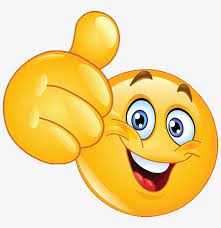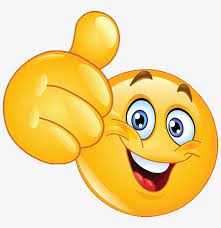